# Experiments

In this notebook is implemented the three experiments described in the paper.

## Header

Libraries and additional programs

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

pathh = '../Data/' 
#exp_file = 'ExperimentalResults_2.xlsx'  #Datos obtenidos con mis encuestas
#exp_file = 'ExperimentalResults_3.xlsx'   # Datos de MTURK-771
exp_file = '../Data/ExperimentalResults_4.xlsx'   # Q1 Modificado...

## Initializing memory and encoding dataset in HD space

In [4]:
%run EncodingDataset.ipynb
Init_mem()

End of memory initialization
Begining to encode dataset...
End of encoding


## Experiment 1

Given a concept it retrieves the "num_concepts" most similar concepts to it (for each different method). A comparison between methods is done by counting the number of coincidences between lists of concepts.

In [5]:
import random 

# List of all concepts in dataset
Concepts = get_concepts_list() 

# Test concepts
sample_size = 10
#Test_Concepts = random.sample(Concepts, sample_size)
Test_Concepts =  ['spoon'] #, 'airplane', 'chair']
print Test_Concepts

num_concepts = 11
coincidence = []

for test_concept in Test_Concepts:
    print "\n\nConcept: ", test_concept
    # Asking closest concept of another concept's definition...
    HDC_sim = HDvector.getLabelSP(Dict[test_concept].getPointer())[:num_concepts]
    HDC_sim = NormalizeHammDist(HDC_sim)
    print "HDC_sim: ", HDC_sim
    
    DatSet_sim = ClosestConcepts(test_concept, num_concepts)
    print "DatSet_sim: ", DatSet_sim

    concept = wn.synset( get_synset(test_concept) )
    # Path similarity
    LC_sim = apply_sim_metric(wn.lch_similarity, num_concepts, concept ) 
    print "LC_sim: ", LC_sim
    WUP_sim = apply_sim_metric(wn.wup_similarity, num_concepts, concept )
    print "WUP_sim: ", WUP_sim
    
    # Information Content
    Res_sim = apply_sim_metric(wn.res_similarity, num_concepts, concept, brown_ic)
    print "Res_sim: ", Res_sim
    JC_sim = apply_sim_metric(wn.jcn_similarity, num_concepts, concept, brown_ic)
    print "JC_sim: ", JC_sim
    
    # Comparing lists agains HDC_sim for counting coincidence.
    # Creating name sets
    HDC_names = set([x[0] for x in HDC_sim])
    DatSet_names = set([x[0] for x in DatSet_sim])
    LC_names = set([x[0] for x in LC_sim])
    WUP_names = set([x[0] for x in WUP_sim])
    Res_names = set([x[0] for x in Res_sim])
    JC_names = set([x[0] for x in JC_sim])
    
    coincidence = coincidence + [[len(HDC_names.intersection(DatSet_names)), 
                                 len(HDC_names.intersection(LC_names)), 
                                 len(HDC_names.intersection(WUP_names)),    
                                 len(HDC_names.intersection(Res_names)), 
                                 len(HDC_names.intersection(JC_names))]]
    print coincidence

coincidence = np.array(coincidence)
# Measuring average against each method.
print "Average: ", np.mean(coincidence, axis = 0)

['spoon', 'airplane', 'chair']


Concept:  spoon
HDC_sim:  [['spoon', 1.0], ['ladle', 0.66], ['fork', 0.628], ['spatula', 0.626], ['colander', 0.614], ['tongs', 0.607], ['bucket', 0.594], ['pot', 0.593], ['peg', 0.591], ['sleigh', 0.588], ['strainer', 0.584]]
DatSet_sim:  [['spoon', 1.0], ['fork', 0.546], ['ladle', 0.411], ['spatula', 0.395], ['tongs', 0.35], ['colander', 0.336], ['bowl', 0.292], ['strainer', 0.282], ['dish', 0.282], ['peg', 0.28], ['grater', 0.259]]
LC_sim:  [['spoon', 3.638], ['bag', 2.539], ['basket', 2.539], ['bin_(waste)', 2.539], ['box', 2.539], ['cup', 2.539], ['dish', 2.539], ['envelope', 2.539], ['fork', 2.539], ['thimble', 2.539], ['ashtray', 2.251]]
WUP_sim:  [['fork', 0.9], ['spoon', 0.9], ['bag', 0.875], ['basket', 0.875], ['bin_(waste)', 0.875], ['box', 0.875], ['envelope', 0.875], ['thimble', 0.875], ['ashtray', 0.824], ['barrel', 0.824], ['bathtub', 0.824]]
Res_sim:  [['spoon', 11.208], ['fork', 10.574], ['cup', 7.49], ['dish', 7.49], ['plate', 7.49], [

KeyboardInterrupt: 

## Experiment 2

### a) Human-judged similarity

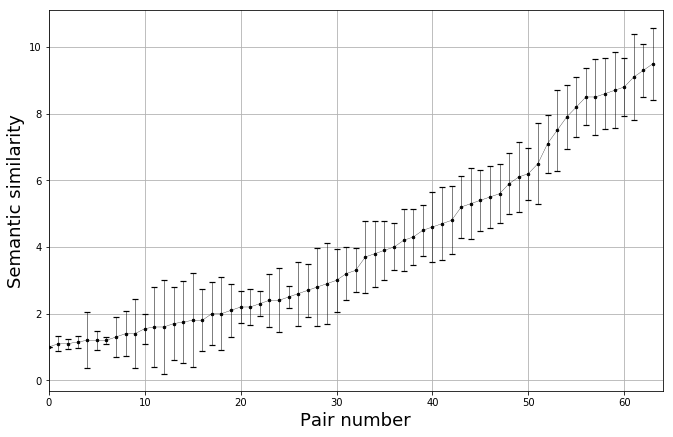

In [22]:
def ListofPairs (number):
    "It obtains a list of pairs of concepts"
    df = pd.read_excel(exp_file)
    if number > 0:
        string = 'Q' + str(number)    
    else:
        string = 'average'
    # 1) List of concepts
    ordered = df.sort_values(by=string)
    c1 = map(str, list( ordered['concept 1'] ))
    c2 = map(str, list( ordered['concept 2'] ))
    L1 = map(list, zip(c1,c2))
    
    # 2) Human similarity and stdev
    ordered = df.sort_values(by=string)
    L2 = list(ordered[string])
    L3 = list(ordered['stdev'])
    return L1, L2, L3

PConcepts, Hum_Sim, stdev = ListofPairs(1)


x = np.array(range(64))
stdev = np.array(map(lambda x: x*0.5, stdev))

plt.rcParams["figure.figsize"] = [11,7]

line,caps,bars = plt.errorbar(x, Hum_Sim, stdev,       
                    fmt="k-",
                    #linestyle='None',
                    marker='.',
                    markersize=5,
                    linewidth=0.3,
                    elinewidth=0.5,
                    ecolor='k',
                    capsize=3,
                    capthick=1.2)

# plt.setp(bars,label="Std dev")
# plt.legend(loc=('upper left'), prop={'size': 15})
plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png', dpi=300)
#plt.errorbar(x, Hum_Sim, stdev, linestyle='None', marker='.')

### b) VSA approach

In this cell we compute the semantic similarity by measuring normalized hamming distance of semantic pointers stored in memory.

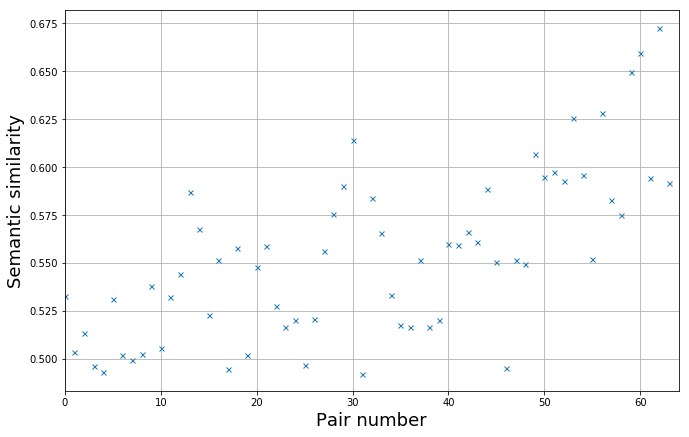

In [42]:
# Create dictionary of distances ( key: number(index) , value: similarity value )
Dict_HD = {}
# Distance vector (for plotting)
HD_sim = []

# VER SI DE DICT PUEDO SACAR VALUES PERO EN MISMO ORDEN - GRAFICAR
key = 0
for cc in PConcepts:
    dist = 1. - HDvector.dist(Dict[cc[0]].getPointer(), Dict[cc[1]].getPointer()) / float(N)
    HD_sim.append(dist)
    Dict_HD[key] = dist
    key += 1
    
# Plotting
plt.rcParams["figure.figsize"] = [11,7]

plt.plot(HD_sim,
         linestyle='None',
         marker='x',
         markersize=5,
         linewidth=1 )  

# plt.legend(loc=('upper left'), prop={'size': 15})
plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HDCSim.png', dpi=300)

### c) McRae similarity

Distances have already been computed in the McRae dataset, this cell is to consult distance between pairs of concepts

Starting...
['spoon', 'barrel']
['spoon', 'envelope']
['shoes', 'bike']
['chair', 'pen']
['shoes', 'carpet']
['spoon', 'box']
['spoon', 'truck']
['table', 'brush']
['table', 'curtains']
['shoes', 'skirt']
['shoes', 'shield']
['table', 'knife']
['table', 'spoon']
['stove', 'pot']
['bed', 'pajamas']
['pen', 'envelope']
['bed', 'mink_(coat)']
['shoes', 'mink_(coat)']
['shovel', 'machete']
['chair', 'car']
['spoon', 'basket']
['table', 'barrel']
['shoes', 'whip']
['table', 'lamp']
['bed', 'lamp']
['chair', 'book']
['shoes', 'earmuffs']
['table', 'bookcase']
['shoes', 'socks']
['cup', 'bottle']
['spoon', 'colander']
['bed', 'curtains']
['carpet', 'scarf']
['table', 'sofa']
['bed', 'chair']
['bowl', 'bathtub']
['spoon', 'ashtray']
['bed', 'dresser']
['bed', 'closet']
['bed', 'table']
['table', 'bench']
['bed', 'cushion']
['bed', 'pillow']
['boots', 'belt']
['shoes', 'belt']
['chair', 'dresser']
['chair', 'closet']
['chair', 'bookcase']
['spoon', 'plate']
['spoon', 'tongs']
['table', 'chair']

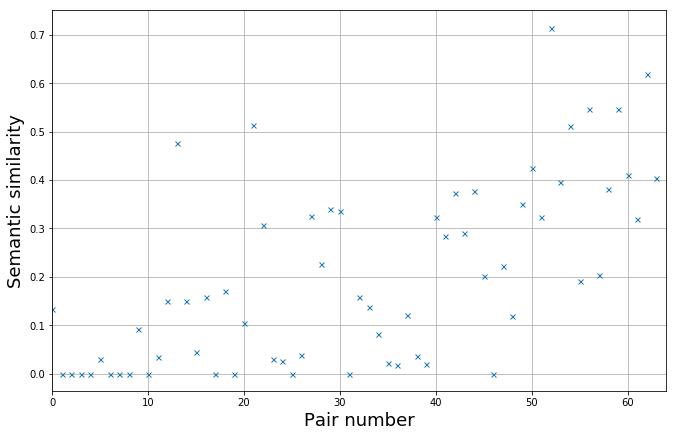

In [38]:
def McRae_simi (pair_concepts):
    "Given a pair of concepts (in a list) it consults the similarity from the cos_matrix... file"
    try: 
        df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','1st_200')
        return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
    except:
        try:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','2nd_200')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
        except:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','last_141')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]

# Dictionary of distances (McRae)
Dict_McRae = {}
McR_sim = []
key = 0
print "Starting..."
for cc in PConcepts:
    dist = McRae_simi(cc)
    Dict_McRae[key] = dist
    McR_sim.append(dist)
    key += 1
print "Fin"

# Plotting
plt.rcParams["figure.figsize"] = [11,7]

plt.plot(McR_sim,
         linestyle='None',
         marker='x',
         markersize=5,
         linewidth=1 )  

# plt.legend(loc=('upper left'), prop={'size': 15})
plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('McRaeSim.png', dpi=300)

### d) WordNet measures

Measuring semantic similarity using structure and information based algorithms.

In [9]:
# Empty dictionaries
Dict_wup = {}; Dict_lch = {}; Dict_res = {}; Dict_jcn = {}

print "Inicio"
key = 0
for pair in PConcepts:
    Dict_wup[key] = similarity_fun(wn.wup_similarity, pair)
    Dict_lch[key] = similarity_fun(wn.lch_similarity, pair)
    Dict_res[key] = similarity_fun(wn.res_similarity, pair, brown_ic)
    Dict_jcn[key] = similarity_fun(wn.jcn_similarity, pair, brown_ic)
    key += 1

print "Fin"

Inicio
Fin


### e) Correlations

This cell obtains the correlations between each of the previous measures against the human-judged set. 

Inicio
[0, 6, 2, 1, 3, 10, 22, 5, 25, 7, 20, 8, 36, 19, 21, 32, 24, 4, 11, 23, 16, 26, 12, 9, 46, 17, 31, 47, 35, 45, 27, 38, 30, 34, 37, 44, 39, 43, 33, 15, 14, 18, 40, 13, 41, 51, 49, 50, 53, 28, 52, 48, 42, 29, 55, 63, 59, 61, 54, 56, 58, 57, 60, 62]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[30, 17, 46, 9, 12, 26, 16, 11, 4, 24, 21, 6, 19, 8, 20, 7, 25, 5, 22, 10, 3, 2, 1, 36, 34, 0, 53, 33, 51, 49, 41, 40, 45, 23, 39, 47, 35, 31, 61, 54, 29, 32, 27, 18, 59, 63, 52, 43, 13, 44, 38, 55, 15, 60, 50, 48, 14, 37, 56, 57, 62, 42, 58, 28]
[0, 9, 12, 15, 14, 16, 13, 11, 4, 8, 6, 1, 2, 3, 7, 10, 5, 20, 17, 26, 18, 22, 23, 25, 24, 27, 28, 21, 19, 29, 31, 32, 30, 34, 41, 33, 42, 37, 38, 39, 36, 40, 35, 48, 50, 47, 43, 46, 44, 45, 49, 52, 51, 53, 63, 59, 54, 58, 57, 60, 55, 61, 56, 62]
[0, 1

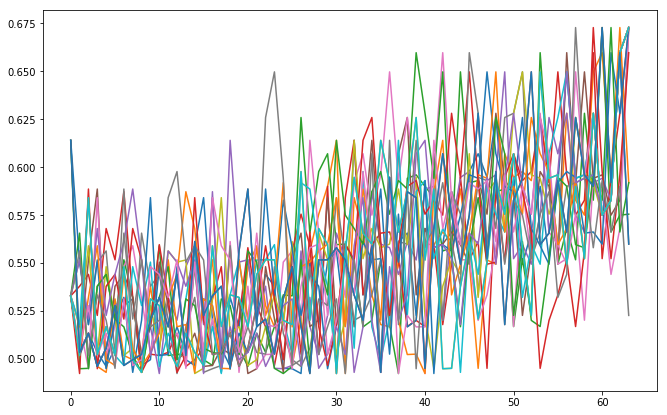

In [43]:
print "Inicio"
Corr_mat = []
for Q in range(21):
    # 1) Obtain "human list", it can be the average responses or an specific one
    Hum_sim =  ListofPairs(Q) #or Q + #0-30
    
    # 2) Obtain list of ordered concepts (keys)
    keys = map(lambda x: PConcepts.index(x), Hum_sim[0])
    print keys
    # 3) Create a list of distances according to each metric by consulting the appropiate dictionary
    HD_sim = [Dict_HD[x] for x in keys]
    McRae_sim = [Dict_McRae[x] for x in keys]
    wup_sim = [Dict_wup[x] for x in keys]
    lch_sim = [Dict_lch[x] for x in keys]
    # optional... 
    # lch_sim = map(lambda x: round(x/float( max(lch_sim)) , 3), lch_sim)
    res_sim = [Dict_res[x] for x in keys]
    # optional
    #res_sim = map(lambda x: round(x/float( max(res_sim)) , 3), res_sim)
    jcn_sim = [Dict_jcn[x] for x in keys]

    # 4) Calculate correlations
    correlations = [['HDC', pearsonr(Hum_sim[1], HD_sim)[0]], ['McRae', pearsonr(Hum_sim[1], McRae_sim)[0]],
                    ['wup', pearsonr(Hum_sim[1], wup_sim)[0]], ['lch', pearsonr(Hum_sim[1], lch_sim)[0]],
                    ['res', pearsonr(Hum_sim[1], res_sim)[0]], ['jcn', pearsonr(Hum_sim[1], jcn_sim)[0]]]

    # 5) Sort list based on correlation value (highest first)
    correlations = sorted(correlations, key = lambda x: x[1], reverse = True)
    
    # 6) Adding 'name' and average correlation value
    Corr_mat.append( ['Q' + str(Q), np.mean([r[1] for r in correlations])] + correlations )
    
    plt.plot(HD_sim)

# 7) Sorting entire matrix by average value (last...)
Corr_mat = sorted(Corr_mat, key = lambda x: x[1], reverse = True)

# Printing
for v in Corr_mat:
    print v